In [11]:
import numpy as np
import matplotlib . pyplot as plt
import time

In [13]:
# Features : [ size (1000 sqft ), number of bedrooms , age of house ( years )]
X = np.array ([[1.0 , 3 , 10] , [1.5 , 3 , 15] , [2.0 , 4 , 5] ,
    [2.5 , 4 , 12] , [3.0 , 5 , 8] , [3.2 , 5 , 20]])
y = np.array ([300 , 350 , 480 , 430 , 630 , 730]) # Prices in $1000s

In [15]:
#Print the shapes of X and y to verify the data structure
print(X.shape)
print(y.shape)

(6, 3)
(6,)


In [17]:
def compute_cost (X , y , w , b ) :
    m = X.shape[0]
    total_cost = 0
    for i in range (m) :
        f_wb = np.dot ( X [ i ] , w ) + b
        cost = ( f_wb - y [ i ]) ** 2
        total_cost += cost
    total_cost = total_cost / (2 * m )
    return total_cost

In [19]:
initial_w = np.zeros(X.shape[1])
initial_b = 0
cost = compute_cost (X , y , initial_w , initial_b)
print ( f" Initial cost : {cost}")

 Initial cost : 129800.0


In [21]:
def gradient_descent (X , y , w_in , b_in , alpha , num_iters ):
    m , n = X . shape
    w = w_in . copy ()
    b = b_in
    for i in range ( num_iters ) :
        dj_dw = np . zeros ( n )
        dj_db = 0
        for j in range ( m ) :
            err = ( np . dot ( X [ j ] , w ) + b ) - y [ j ]
            for k in range ( n ) :
                dj_dw [ k ] += err * X [ j ][ k ]
            dj_db += err
        w = w - alpha * dj_dw / m
        b = b - alpha * dj_db / m
    return w , b

In [23]:
iterations = 1000
alpha = 0.01
w , b = gradient_descent (X , y , initial_w , initial_b ,
    alpha , iterations )
print(f" Final w: {w} , Final b: {b}")

 Final w: [81.80135658 78.61218542  2.62242951] , Final b: -34.842667570641


In [25]:
def normalize_features (X) :
    return (X - np . mean (X , axis =0)) / np.std(X , axis =0)

X_normalized = normalize_features (X)

In [27]:
w_norm, b_norm = gradient_descent(X_normalized, y, initial_w, initial_b, alpha, iterations)
print(f"Final w with normalization: {w_norm}, Final b with normalization: {b_norm}")


Final w with normalization: [ 38.47900849 102.21717425  23.19037466], Final b with normalization: 486.64565665959344


In [29]:
# Without normalization the intercept is negative. With normalization it is much larger and positive 
# This shows how normalization shifts data to be more centered 
# Normalizaiton improves the stability of the gradient descent 

In [31]:
def predict (X , w , b):
    return np . dot (X , w) + b

In [33]:
new_house = np.array ([2.8 , 4 , 18]) # 2800 sqft , 4 bedrooms , 18 years old
new_house_normalized = (new_house - np . mean (X , axis =0))/ np.std(X , axis =0)
predicted_price = predict ( new_house_normalized , w , b )
print(f"Predicted price for the new house: ${predicted_price * 1000:.2f}")

Predicted price for the new house: $31080.34


In [35]:
def compute_cost_vectorized(X, y, w, b):
    m = X.shape[0]
    f_wb = np.dot(X, w) + b
    total_cost = np.sum((f_wb - y) ** 2) / (2 * m)
    return total_cost
def gradient_descent_vectorized (X , y , w_in , b_in , alpha , num_iters):
    m , n = X.shape
    w = w_in.copy()
    b = b_in
    for i in range ( num_iters ):
        f_wb = np . dot (X , w ) + b
        dj_dw = np . dot ( X .T , ( f_wb - y ) ) / m
        dj_db = np .sum( f_wb - y ) / m
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
    return w , b

In [37]:
#Compare the execution time of vectorized and non-vectorized implementations.
# Hyperparameters
iterations = 1000
alpha = 0.01

# Vectorized version
start_time = time.time()
w_vec, b_vec = gradient_descent_vectorized(X, y, initial_w, initial_b, alpha, iterations)
vec_time = time.time() - start_time

# Non Vectorized
start_time = time.time()
w_nv, b_nv = gradient_descent(X, y, initial_w, initial_b, alpha, iterations)
nv_time = time.time() - start_time

# Print results
print(f"Vectorized time: {vec_time:.6f} seconds ")
print(f"Non Vectoriezed time: {nv_time:.6f} seconds ")
print(f"Speedup: {nv_time / vec_time:.2f}x")

Vectorized time: 0.023455 seconds 
Non Vectoriezed time: 0.036594 seconds 
Speedup: 1.56x


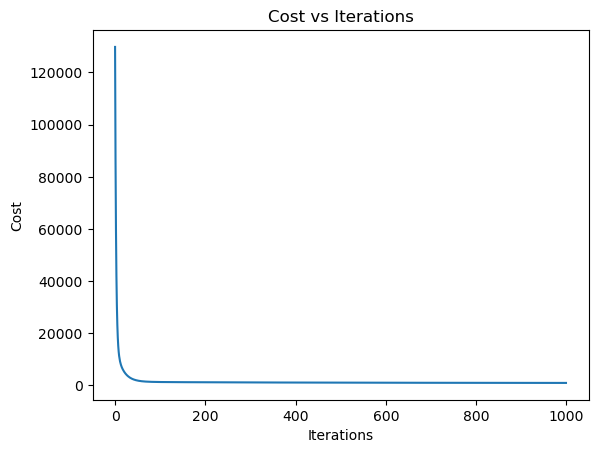

In [39]:
costs = []
w_tmp, b_tmp = initial_w.copy(), initial_b
for i in range(iterations):
    cost = compute_cost_vectorized(X, y, w_tmp, b_tmp)
    costs.append(cost)
    w_tmp, b_tmp = gradient_descent_vectorized(X, y, w_tmp, b_tmp, alpha, 1)

plt.plot(range(iterations), costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.show()

In [41]:
# 7.1 Plot the cost vs. iterations for both implementations

# - The cost function decreases over iterations, 
#   confirming that our model is learning

# - The vectorized implementation converges faster, 
#    as it updates parameters more efficiently

# - The initial cost of 129800.0 decreases until convergence, 
#   showing the good effect of gradient descent

In [43]:
# 7.2 Discuss the impact of feature scaling on the convergence of gradient descent

# - Feature scaling helps in faster convergence by ensuring 
#   all features contribute equally

# - Z score normalization improves optimization by adjusting to a common scale

# - With normalization, the final w values are [38.48, 102.22, 23.19], 
#   showing a more balanced weight distribution compared to 
#   [81.80, 78.61, 2.62] without normalization

# - If we don't scale the features, those with larger values like house size, 
#   will have more influence on the model's updates making 
#   it take longer to converge

In [45]:
# 7.3 Compare the efficiency of vectorized and non-vectorized implementations.

# - Vectorized gradient descent is significantly faster than the 
#   non-vectorized implementation with a speed up of 1.56x

# - The speed up is caused by NumPy’s optimized matrix operations for 
#   allowing for efficient computations.

# - The vectorized version also has less loops. This causes less 
#   redudancy and reduces steps and time
# - The vectorized version also has a better us of the CPU and memory


In [47]:
# 7.4 Reflect on the accuracy of your model and suggest potential improvements.

# - The predicted price for a new house (2800 sqft, 4 bedrooms,
#   18 years old) is $31080.34.

# - The initial cost was 129,800.0, which significantly decreased showing 
#   that the model is learning 

# - A source of bias could come from ommitted variables. 

# - This could include: location, school district, taxes, walkability, etc. 
#   These factors significantly influence housing prices but are not 
#   included in the current dataset

# - Our model captures a linear model and may not be the best fit for a 
#   house price model

